In [173]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import signal
import csv
from scipy import fft
from scipy.fftpack import fft, fftfreq, ifft
from scipy import interpolate

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,5)

In [174]:
data = np.loadtxt('anitaIVPhotogrammetry.csv', skiprows=2, delimiter=',')
datarows = np.transpose(data)

an = datarows[0]
x = datarows[1]*0.0254
y = datarows[2]*0.0254
z = datarows[3]*0.0254

print(len(data))

48


/tmp/ipykernel_7994/762430278.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


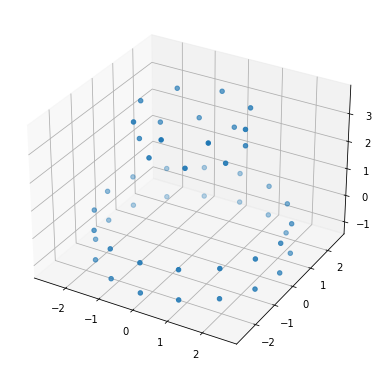

In [175]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z)

[1. 0. 1.]


/tmp/ipykernel_7994/2061566245.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection='3d')


(-5.0, 5.0)

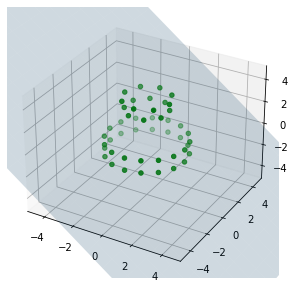

In [176]:
theta = 0.
phi = 0.

x0 = 0.
y0 = 0.
z0 = 0.
c = 299792458

startpos = (x0,y0,z0)
dt = 0

xn = x0+c*dt*np.cos(phi)*np.sin(theta)
yn = y0+c*dt*np.sin(phi)*np.sin(theta)
zn = z0+c*dt*np.cos(theta)
newpos = (xn, yn, zn)


point  = np.array([xn, yn, zn])
#normal = np.array([np.cos(phi)*np.sin(theta), np.sin(phi)*np.sin(theta), np.cos(theta)])
normal = np.array([1., 0., 1.])

print(normal)
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(-10,10), range(-10,10))

# calculate corresponding z
zp = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zp, alpha=0.2)

ax = plt.gca()
ax.scatter(x,y,z, color='green')
ax.set_zlim(-5,5)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

In [177]:
fulldet = []
ants_0 = [[31.7, -18.3, -76.5],
          [39.6, -10.7, -51.6],
          [38.25, 0, -76.5],
          [39.6, 10.7 , -51.6]]

ants_1 = [[76.3, -44, -196],
          [85, -23, -196],
          [88, 0, -196],
          [85, 23, -196]]

ants_2 = [[76.3, -44, -224.75],
          [85, -23, -224.75],
          [88, 0, -224.75],
          [85, 23, -224.75]]

ants_3 = [[76.3, -44, -253.5],
          [85, -23, -253.5],
          [88, 0, -253.5],
          [85, 23, -253.5]]

ants_4 = [[54, -31.25, -345],
          [62, 0, -345]]
i=0
for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_0:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1
        
for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_1:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1

for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_2:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1
        
for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_3:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1
        
for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_4:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1

/tmp/ipykernel_7994/3657714219.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'z [m]')

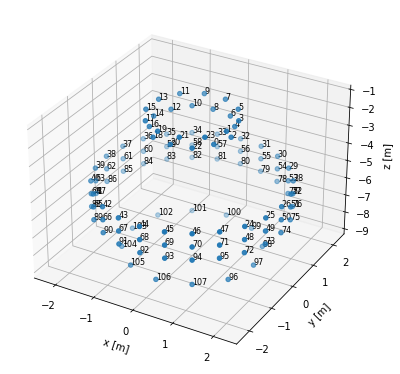

In [178]:
antn = [a[0] for a in fulldet]
antx = [a[1] for a in fulldet]
anty = [a[2] for a in fulldet]
antz = [a[3] for a in fulldet]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(antx,anty,antz)

for i, txt in enumerate(antn):
    ax.text(antx[i], anty[i], antz[i], txt, zorder=1, size=8)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

In [179]:
outfile = open("pueo_antpos.txt", "w")
outfile.write("antn, x, y, z\n")
for ant in fulldet:
    outfile.write("%s, %.4f, %.4f, %.4f\n"%(ant[0], ant[1], ant[2], ant[3]))


outfile.close()

In [181]:
ant_sector = np.concatenate([ants_0, ants_1, ants_2, ants_3, ants_4])

ants = []
for i, ant in enumerate(ant_sector):
    antphi = np.degrees(np.arctan(ant[2]/ant[1]))
    antel = -10.
    ants.append([i, ant[0]*0.0254, ant[1]*0.0254, ant[2]*0.0254, antphi, antel])
ants = np.array(ants)
print(ants)

[[  0.           0.80518     -0.46482     -1.9431      76.54676469
  -10.        ]
 [  1.           1.00584     -0.27178     -1.31064     78.28493107
  -10.        ]
 [  2.           0.97155      0.          -1.9431     -90.
  -10.        ]
 [  3.           1.00584      0.27178     -1.31064    -78.28493107
  -10.        ]
 [  4.           1.93802     -1.1176      -4.9784      77.3474435
  -10.        ]
 [  5.           2.159       -0.5842      -4.9784      83.30712464
  -10.        ]
 [  6.           2.2352       0.          -4.9784     -90.
  -10.        ]
 [  7.           2.159        0.5842      -4.9784     -83.30712464
  -10.        ]
 [  8.           1.93802     -1.1176      -5.70865     78.9231255
  -10.        ]
 [  9.           2.159       -0.5842      -5.70865     84.15692401
  -10.        ]
 [ 10.           2.2352       0.          -5.70865    -90.
  -10.        ]
 [ 11.           2.159        0.5842      -5.70865    -84.15692401
  -10.        ]
 [ 12.           1.93802     -

/tmp/ipykernel_7994/2077527455.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  antphi = np.degrees(np.arctan(ant[2]/ant[1]))


/tmp/ipykernel_7994/353210826.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'z [m]')

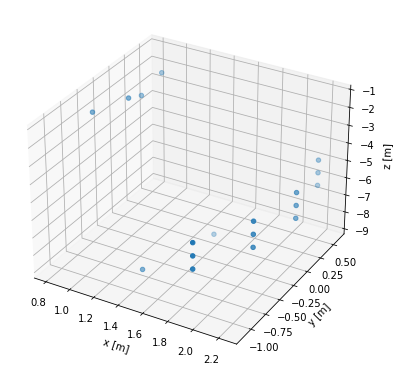

In [182]:
antn = [a[0] for a in ants]
antx = [a[1] for a in ants]
anty = [a[2] for a in ants]
antz = [a[3] for a in ants]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(antx,anty,antz)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

In [183]:
def dist_to_plane(planenorm, point, antpos):
    d = (planenorm[0]*antpos[0]+planenorm[1]*antpos[1]+planenorm[2]*antpos[2]-point.dot(planenorm))/np.sqrt(planenorm[0]**2+planenorm[1]**2+planenorm[2]**2)
    return d

def impulse(testtime, startphase):
    ir = np.genfromtxt('impResp2.csv')
    total_len = 1024
    front_pad = 30#int(testtime/0.333e-9)
    ir[0] = 0.119775

    ir3 = scipy.signal.resample_poly(ir, 3, 10)
    total_with_pad = 1536
    pad_end = total_with_pad - len(ir3) - front_pad
    ir3 = np.pad(ir3, [front_pad, pad_end], mode='constant')
    # These define our band. They'll be used for both signal and noise.
    hpsos = scipy.signal.butter(5, 0.1666, btype='highpass', output='sos')
    lpsos = scipy.signal.butter(5, 0.8, btype='lowpass', output='sos')
    ir3 = scipy.signal.sosfilt(lpsos, ir3)
    ir3 = scipy.signal.sosfilt(hpsos, ir3)
    # Now normalize to the peak. Note that we do this *here* after the highpass, but before any interpolation.
    ir3_p2p = np.amax(ir3)-np.amin(ir3)
    ir3 = ir3/(ir3_p2p/2)

    # Figure out the signal phase
    #ir3_phase = np.random.random_sample()
    ir3_phase = testtime/0.333e-9+startphase
    #print(ir3_phase)
    # shift it
    this_ir3 = scipy.ndimage.shift(ir3, ir3_phase)
    snr = 5
    # Noise is flat originally, shaped by bandpass
    noise = np.random.normal(0, 1, this_ir3.shape)
    noise = scipy.signal.sosfilt(lpsos, noise)
    noise = scipy.signal.sosfilt(hpsos, noise)
    # Scale the signal by desired SNR.
    rms = np.std(noise)
    noise /= rms
    this_ir3 = this_ir3*snr# + noise

    return this_ir3

def calc_hitangle(normal, antdir):
    antx = antdir[0]
    anty = antdir[1]
    antth = antdir[4]
    antphi = np.arctan(anty/antx)
    
    normx = normal[0]
    normy = normal[1]
    normz = normal[2]
    normphi = np.arctan(normy/normx)
    normth = np.arctan(-1.*normz/np.sqrt(normx**2+normy**2))
    
    dphi = np.abs(antphi-normphi)
    dth = np.abs(np.radians(antth)-normth)
    return (np.degrees(dphi), np.degrees(dth))

def apply_angresp_0(imp, hitth, hitphi):
    thgain = g_el_0(hitth)
    phigain = g_azi_0(hitphi)
    return imp*thgain*phigain

def apply_angresp_boresight(imp):
    gain = gains_0
    return imp*gain

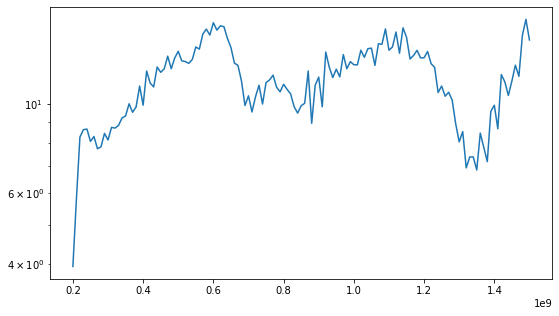

In [46]:
vpol_0 = np.loadtxt('vv_0')
vpol_0_trans = np.transpose(vpol_0)

freqs_0 = vpol_0_trans[0]
gains_0 = vpol_0_trans[1]

plt.semilogy(freqs_0, gains_0)

gains_freq_0 = interpolate.interp1d(freqs_0, gains_0, kind='quadratic', bounds_error=False, fill_value=0.0)



[0.98301265, 0.92905051, 0.74057787, 0.53461143, 0.30639118, 0.069796688]


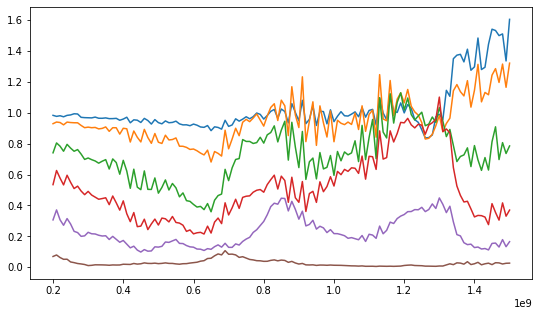

In [47]:

all_resp_el = []

els = [5,10,20,30,45,90]

for i, el in enumerate(els):
    lowind = int(131*i)
    highind = int(131*(i+1))
    vpol_el = np.loadtxt('vv_el')
    vpol_el = vpol_el[lowind:highind]
    all_resp_el.append(vpol_el)

    vpol_el_trans = np.transpose(vpol_el)

    freqs = vpol_el_trans[0]
    gains = vpol_el_trans[1]#*gains_0

    plt.plot(freqs, gains)
    
print([p[0][1] for p in all_resp_el])

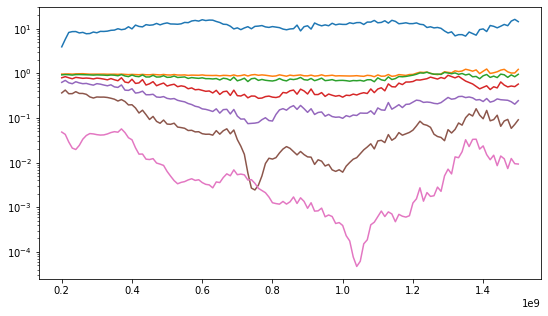

In [48]:
plt.semilogy(freqs_0, gains_0)

all_resp_az = []

azs = [5,10,20,30,45,90]

for i, az in enumerate(azs):
    lowind = int(131*i)
    highind = int(131*(i+1))
    vpol_az = np.loadtxt('vv_az')
    vpol_az = vpol_az[lowind:highind]
    all_resp_az.append(vpol_az)

    vpol_az_trans = np.transpose(vpol_az)

    freqs = vpol_az_trans[0]
    gains = vpol_az_trans[1]#*gains_0

    plt.plot(freqs, gains)
    


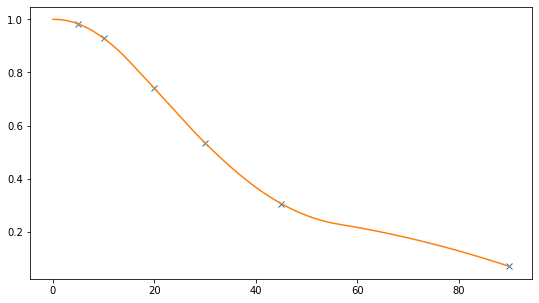

In [49]:
from scipy import interpolate

els = [5,10,20,30,45,90]
elgains = np.array([p[0][1] for p in all_resp_el])
plt.plot(els, elgains, 'x')

padx = np.array([0.])
pady = np.array([1.])
els = np.concatenate([padx, els])
elgains = np.concatenate([pady, elgains])

g_el_lin = interpolate.interp1d(els, elgains, kind='linear')
xvals_lin = [0,5, 10, 20, 30, 45, 67.5, 90]
yvals_lin = g_el_lin(xvals_lin)

g_el_0 = interpolate.interp1d(xvals_lin, yvals_lin, kind='quadratic')

xvals = np.linspace(0,90,180)
yvals = g_el_0(xvals)
plt.plot(xvals, yvals)


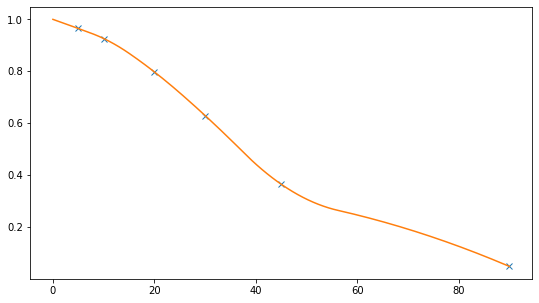

In [50]:
from scipy import interpolate

azis = [5,10,20,30,45,90]
azigains = np.array([p[0][1] for p in all_resp_az])
plt.plot(azis, azigains, 'x')

padx = np.array([0.])
pady = np.array([1.])
azis = np.concatenate([padx, azis])
azigains = np.concatenate([pady, azigains])

g_azi_lin = interpolate.interp1d(azis, azigains, kind='linear')
xvals_lin = [0,5, 10, 20, 30, 45, 67.5, 90]
yvals_lin = g_azi_lin(xvals_lin)

g_azi_0 = interpolate.interp1d(xvals_lin, yvals_lin, kind='quadratic')
xvals = np.linspace(0,90,180)
yvals = g_azi_0(xvals)
plt.plot(xvals, yvals)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.54175841e-10
 2.54175841e-10 2.54175841e-10 2.54175841e-10 2.54175841e-10
 2.54175841e-10 9.91285778e-10 9.91285778e-10 9.91285778e-10
 2.20285728e-09 2.88065953e-09 4.10070356e-09 4.10070356e-09
 4.21508269e-09 4.77003327e-09]


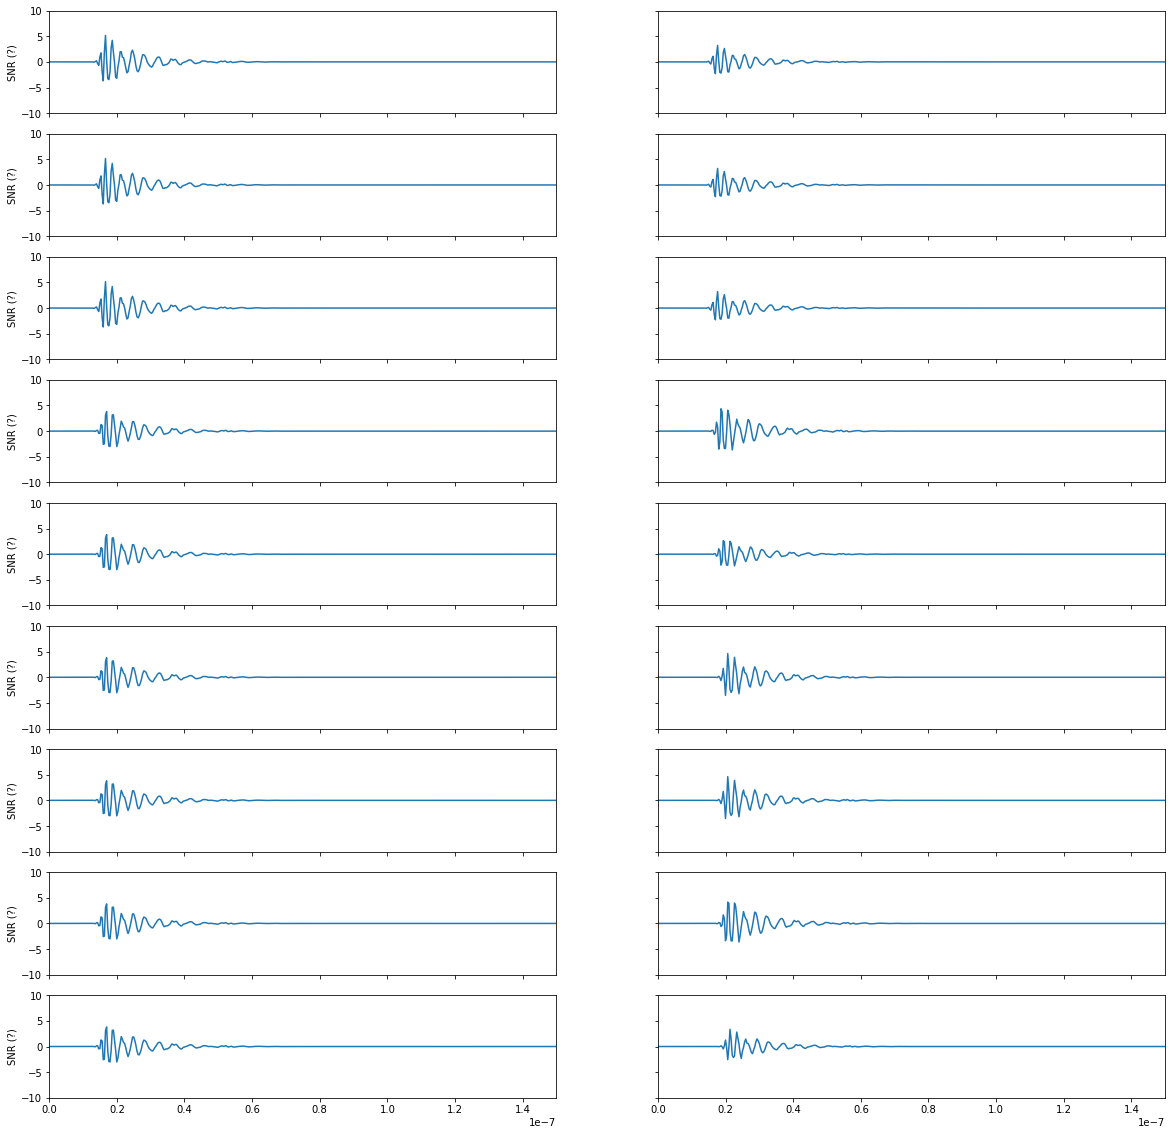

In [51]:
from operator import itemgetter

c = 299792458
total_len = 1024
front_pad = 30


normal = np.array([-1., 0., 0.])
point = np.array([0., 0., -100.])

temphits = []
for d in ants:
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)
print(newhittimes)

startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(9,2,sharex='col', sharey='row')

m=0
for testhit in adjhits:
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    
    after_angresp = apply_angresp_0(this_ir3, hitth, hitphi)
    
    t = np.arange(total_len)*(0.333e-9)

    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i,j].plot(t, after_angresp[0:total_len])
    ax[i,j].set_ylim(-10,10)
    ax[i,j].set_xlim(0,1.5e-7)
    m+=1
    
    if j == 0:
        ax[i,j].set_ylabel('SNR (?)')
    if i == 11:
        ax[i,j].set_xlabel('Time [s]')
plt.rcParams["figure.figsize"] = (9,5)


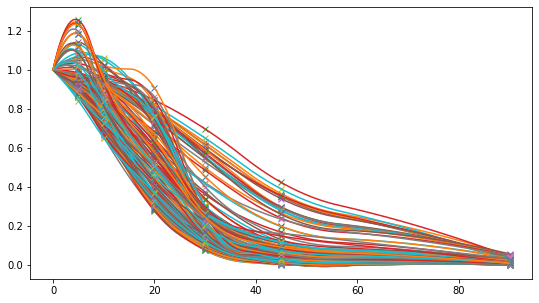

In [52]:
from scipy import interpolate
g_azis = []

for i in range(0,131):
    azis = [5,10,20,30,45,90]
    azigains = np.array([p[i][1] for p in all_resp_az])
    plt.plot(azis, azigains, 'x')

    padx = np.array([0.])
    pady = np.array([1.])
    azis = np.concatenate([padx, azis])
    azigains = np.concatenate([pady, azigains])

    g_azi_lin = interpolate.interp1d(azis, azigains, kind='linear')
    xvals_lin = [0,5, 10, 20, 30, 45, 67.5, 90]
    yvals_lin = g_azi_lin(xvals_lin)

    g_azi = interpolate.interp1d(xvals_lin, yvals_lin, kind='quadratic')
    xvals = np.linspace(0,90,180)
    yvals = g_azi(xvals)
    plt.plot(xvals, yvals)
    g_azis.append(g_azi)



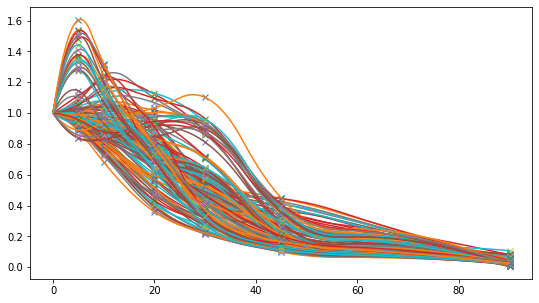

In [53]:
from scipy import interpolate

g_els = []
for i in range(0,131):
    els = [5,10,20,30,45,90]
    elgains = np.array([p[i][1] for p in all_resp_el])
    plt.plot(els, elgains, 'x')

    padx = np.array([0.])
    pady = np.array([1.])
    els = np.concatenate([padx, els])
    elgains = np.concatenate([pady, elgains])

    g_el_lin = interpolate.interp1d(els, elgains, kind='linear')
    xvals_lin = [0,5, 10, 20, 30, 45, 67.5, 90]
    yvals_lin = g_el_lin(xvals_lin)
    
    g_el = interpolate.interp1d(xvals_lin, yvals_lin, kind='quadratic')
    g_els.append(g_el)
    
    xvals = np.linspace(0,90,180)
    yvals = g_el(xvals)
    plt.plot(xvals, yvals)

freqs = np.concatenate([np.arange(0,2e8,1e7),freqs])    

In [147]:
def impulse(testtime, startphase):
    ir = np.genfromtxt('impResp2.csv')
    total_len = 1024
    front_pad = 30#int(testtime/0.333e-9)
    ir[0] = 0.119775

    ir3 = scipy.signal.resample_poly(ir, 3, 10)
    total_with_pad = 1536
    pad_end = total_with_pad - len(ir3) - front_pad
    ir3 = np.pad(ir3, [front_pad, pad_end], mode='constant')
    # These define our band. They'll be used for both signal and noise.
    hpsos = scipy.signal.butter(5, 0.1666, btype='highpass', output='sos')
    lpsos = scipy.signal.butter(5, 0.8, btype='lowpass', output='sos')
    ir3 = scipy.signal.sosfilt(lpsos, ir3)
    ir3 = scipy.signal.sosfilt(hpsos, ir3)
    # Now normalize to the peak. Note that we do this *here* after the highpass, but before any interpolation.
    ir3_p2p = np.amax(ir3)-np.amin(ir3)
    ir3 = ir3/(ir3_p2p/2)

    # Figure out the signal phase
    #ir3_phase = np.random.random_sample()
    ir3_phase = testtime/0.333e-9+startphase
    #print(ir3_phase)
    # shift it
    this_ir3 = scipy.ndimage.shift(ir3, ir3_phase)
    snr = 5
    # Noise is flat originally, shaped by bandpass
    noise = np.random.normal(0, 1, this_ir3.shape)
    noise = scipy.signal.sosfilt(lpsos, noise)
    noise = scipy.signal.sosfilt(hpsos, noise)
    # Scale the signal by desired SNR.
    rms = np.std(noise)
    noise /= rms
    this_ir3 = this_ir3*snr# + noise

    return this_ir3

def apply_angresp(imp, dth, dphi):
    freqresp = [g(dphi) for g in g_azis]
    freqresp = np.concatenate([np.zeros(20), freqresp])
    gains_freq_az = interpolate.interp1d(freqs, freqresp, kind='quadratic', bounds_error=False, fill_value=0.0)
    
    freqresp_th = [g(dth) for g in g_els]
    freqresp_th = np.concatenate([np.zeros(20), freqresp_th])
    gains_freq_th = interpolate.interp1d(freqs, freqresp_th, kind='quadratic', bounds_error=False, fill_value=0.0)
        
    tir3f = fft(imp)
    tir3f_freqs = fftfreq(len(tir3f), d=t[1]-t[0])
    if np.abs(dth) < 5. and np.abs(dphi) < 5.:
        scaled_amps_pos = tir3f[0:len(tir3f_freqs)//2]*gains_freq_0(tir3f_freqs[0:len(tir3f_freqs)//2])*gains_freq_0(tir3f_freqs[0:len(tir3f_freqs)//2])
        scaled_amps_neg = tir3f[len(tir3f_freqs)//2:]*gains_freq_0(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]*gains_freq_0(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]
    if np.abs(dth) < 5. and np.abs(dphi) > 5.:
        scaled_amps_pos = tir3f[0:len(tir3f_freqs)//2]*gains_freq_az(tir3f_freqs[0:len(tir3f_freqs)//2])*gains_freq_th(tir3f_freqs[0:len(tir3f_freqs)//2])
        scaled_amps_neg = tir3f[len(tir3f_freqs)//2:]*gains_freq_az(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]*gains_freq_th(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]
    if np.abs(dth) > 5. and np.abs(dphi) < 5.:
        scaled_amps_pos = tir3f[0:len(tir3f_freqs)//2]*gains_freq_az(tir3f_freqs[0:len(tir3f_freqs)//2])*gains_freq_th(tir3f_freqs[0:len(tir3f_freqs)//2])
        scaled_amps_neg = tir3f[len(tir3f_freqs)//2:]*gains_freq_az(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]*gains_freq_th(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]        
    else:
        scaled_amps_pos = tir3f[0:len(tir3f_freqs)//2]*gains_freq_az(tir3f_freqs[0:len(tir3f_freqs)//2])*gains_freq_th(tir3f_freqs[0:len(tir3f_freqs)//2])
        scaled_amps_neg = tir3f[len(tir3f_freqs)//2:]*gains_freq_az(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]*gains_freq_th(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]
    scaled_amps = np.concatenate([scaled_amps_pos, scaled_amps_neg])
    
    itir3f = ifft(scaled_amps)  
    return itir3f

/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


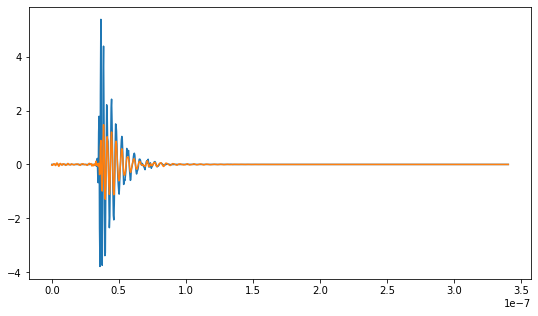

In [148]:
dphi = 30.
dth = 10.

t = np.arange(1024)*(0.333e-9)
this_ir3 = impulse(0.2e-7,np.random.random_sample())#[0:1024]
plt.plot(t, this_ir3[0:1024])

imp_azi = apply_angresp(this_ir3, dth, dphi)
plt.plot(t, imp_azi[0:1024])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.54175841e-10
 2.54175841e-10 2.54175841e-10 2.54175841e-10 2.54175841e-10
 2.54175841e-10 9.91285778e-10 9.91285778e-10 9.91285778e-10
 2.20285728e-09 2.88065953e-09 4.10070356e-09 4.10070356e-09
 4.21508269e-09 4.77003327e-09]


/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplo

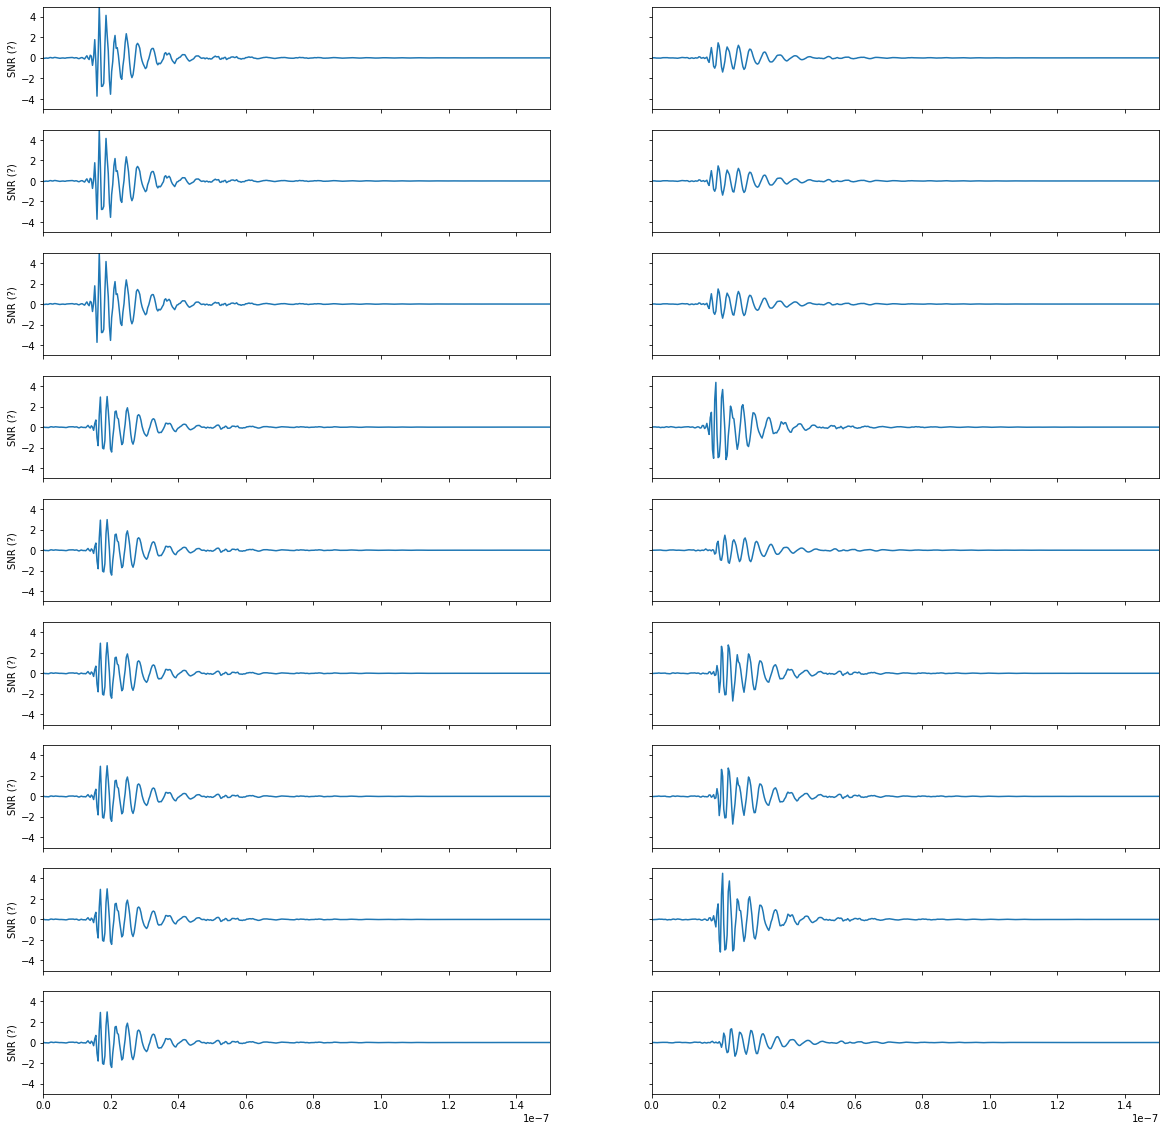

In [149]:
from operator import itemgetter

c = 299792458

normal = np.array([-1., 0., 0.])
point = np.array([100., 0., 0.])

temphits = []
for d in ants:
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)
print(newhittimes)

startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(9,2,sharex='col', sharey='row')

m=0
for testhit in adjhits:
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    
    after_angresp = apply_angresp(this_ir3, hitth, hitphi)
    
    t = np.arange(total_len)*(0.333e-9)

    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i,j].plot(t, after_angresp[0:total_len])
    ax[i,j].set_ylim(-5,5)
    ax[i,j].set_xlim(0,1.5e-7)
    m+=1
    
    if j == 0:
        ax[i,j].set_ylabel('SNR (?)')
    if i == 11:
        ax[i,j].set_xlabel('Time [s]')
plt.rcParams["figure.figsize"] = (9,5)

In [150]:
def make_noise(this_ir3):
    hpsos = scipy.signal.butter(5, 0.1666, btype='highpass', output='sos')
    lpsos = scipy.signal.butter(5, 0.8, btype='lowpass', output='sos')
    noise = np.random.normal(0, 1, this_ir3.shape)
    noise = scipy.signal.sosfilt(lpsos, noise)
    noise = scipy.signal.sosfilt(hpsos, noise)
    return noise

/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


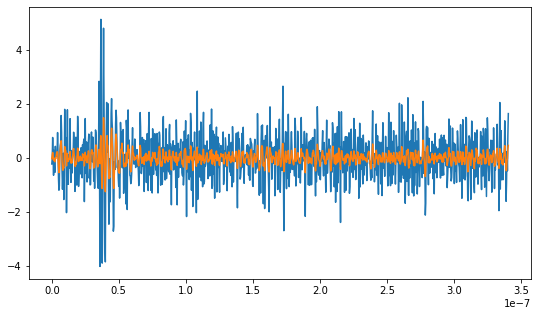

In [151]:
dphi = 30.
dth = 10.

t = np.arange(1024)*(0.333e-9)
this_ir3 = impulse(0.2e-7,np.random.random_sample())#[0:1024]
noise = make_noise(this_ir3)
this_ir3 = this_ir3+noise
plt.plot(t, this_ir3[0:1024])

imp_azi = apply_angresp(this_ir3, dth, dphi)
plt.plot(t, imp_azi[0:1024])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.54175841e-10
 2.54175841e-10 2.54175841e-10 2.54175841e-10 2.54175841e-10
 2.54175841e-10 9.91285778e-10 9.91285778e-10 9.91285778e-10
 2.20285728e-09 2.88065953e-09 4.10070356e-09 4.10070356e-09
 4.21508269e-09 4.77003327e-09]


/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplo

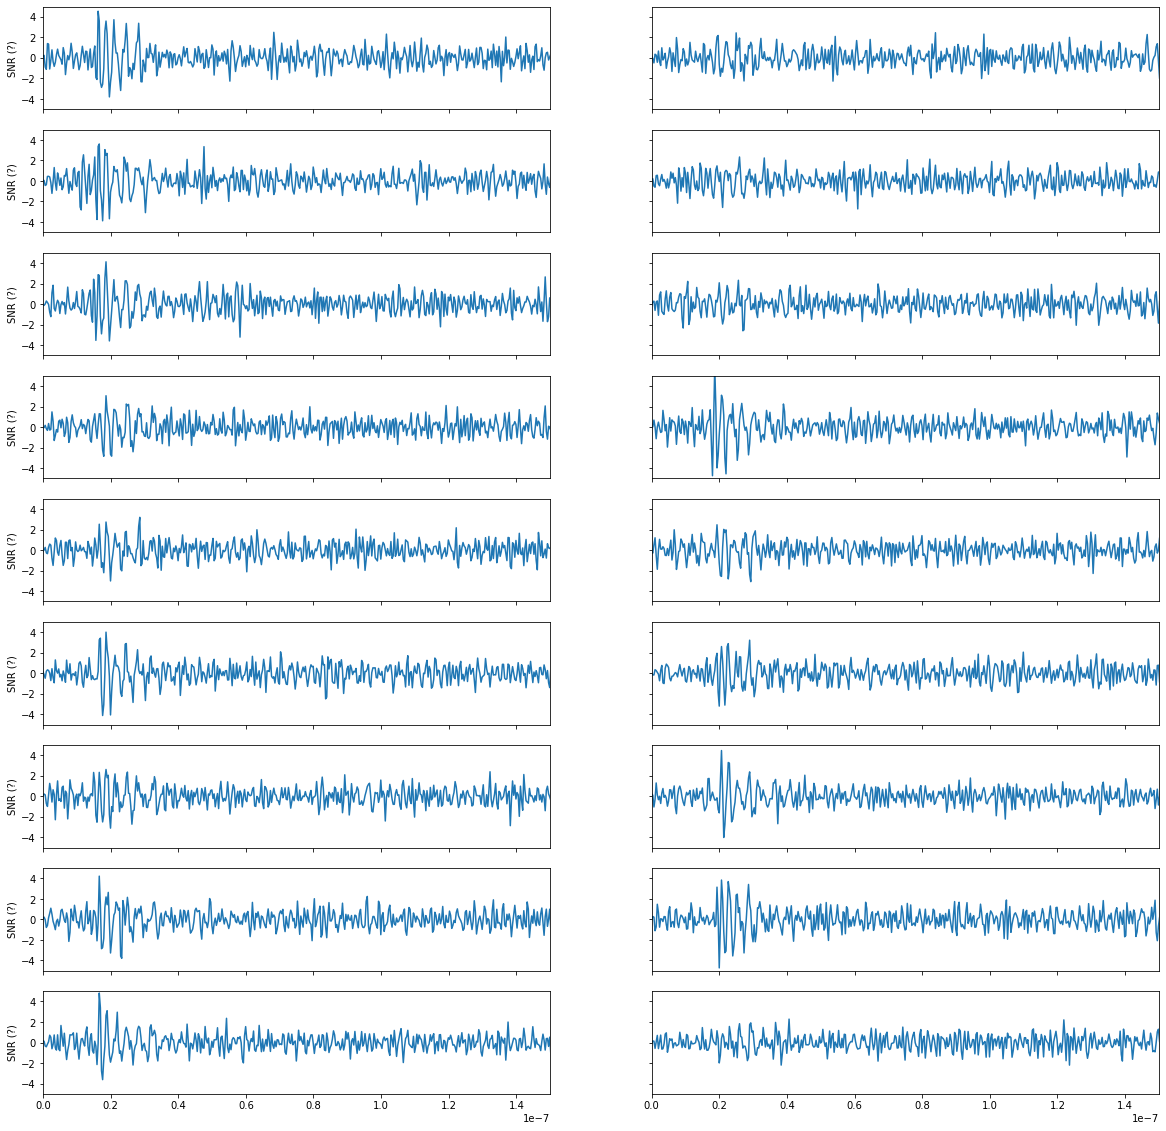

In [152]:
from operator import itemgetter

c = 299792458

normal = np.array([-1., 0., 0.])
point = np.array([100., 0., 0.])

temphits = []
for d in ants:
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)
print(newhittimes)

startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(9,2,sharex='col', sharey='row')

m=0
for testhit in adjhits:
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    
    after_angresp = apply_angresp(this_ir3, hitth, hitphi)
    noise = make_noise(after_angresp)
    after_angresp = after_angresp+noise
    
    t = np.arange(total_len)*(0.333e-9)

    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i,j].plot(t, after_angresp[0:total_len])
    ax[i,j].set_ylim(-5,5)
    ax[i,j].set_xlim(0,1.5e-7)
    m+=1
    
    if j == 0:
        ax[i,j].set_ylabel('SNR (?)')
    if i == 11:
        ax[i,j].set_xlabel('Time [s]')
plt.rcParams["figure.figsize"] = (9,5)

In [153]:
def read_antfile():
	antdata = np.loadtxt("pueo_antpos.txt", skiprows=1, delimiter=',')

	tantdata = np.transpose(antdata)

	antarr = np.recarray(len(tantdata[0]), dtype=[('ant_id', int), ('x', float), ('y', float), ('z', float)])

	antarr['ant_id'] = tantdata[0]
	antarr['x'] = tantdata[1]
	antarr['y'] = tantdata[2]
	antarr['z'] = tantdata[3]

	return antarr

In [154]:
antdata = read_antfile()
print(antdata.dtype.names)
print(antdata)
which_ids = [0, 1, 24, 25, 48,49, 72, 73]
ant_sector = antdata[which_ids]

('ant_id', 'x', 'y', 'z')
[(  0,  8.0520e-01, -0.4648, -1.9431) (  1,  1.0058e+00, -0.2718, -1.3106)
 (  2,  9.7150e-01,  0.    , -1.9431) (  3,  1.0058e+00,  0.2718, -1.3106)
 (  4,  8.0510e-01,  0.4649, -1.9431) (  5,  7.3830e-01,  0.7352, -1.3106)
 (  6,  4.8580e-01,  0.8414, -1.9431) (  7,  2.6760e-01,  1.007 , -1.3106)
 (  8, -0.0000e+00,  0.9297, -1.9431) (  9, -2.6760e-01,  1.007 , -1.3106)
 ( 10, -4.8580e-01,  0.8414, -1.9431) ( 11, -7.3830e-01,  0.7352, -1.3106)
 ( 12, -8.0520e-01,  0.4648, -1.9431) ( 13, -1.0058e+00,  0.2718, -1.3106)
 ( 14, -9.7150e-01,  0.    , -1.9431) ( 15, -1.0058e+00, -0.2718, -1.3106)
 ( 16, -8.0510e-01, -0.4649, -1.9431) ( 17, -7.3830e-01, -0.7352, -1.3106)
 ( 18, -4.8580e-01, -0.8414, -1.9431) ( 19, -2.6760e-01, -1.007 , -1.3106)
 ( 20,  0.0000e+00, -0.9297, -1.9431) ( 21,  2.6760e-01, -1.007 , -1.3106)
 ( 22,  4.8580e-01, -0.8414, -1.9431) ( 23,  7.3830e-01, -0.7352, -1.3106)
 ( 24,  1.9380e+00, -1.1176, -4.9784) ( 25,  2.1590e+00, -0.5842, -4.9784)

In [155]:
print(ant_sector)
rotangle = 30.
for ant in ant_sector:
    newx = (ant['x']*np.cos(np.radians(rotangle))-ant['y']*np.sin(np.radians(rotangle)))
    newy = (ant['x']*np.sin(np.radians(rotangle))+ant['y']*np.cos(np.radians(rotangle)))
    newz = ant['z']
    ant['x'] = newx
    ant['y'] = newy
    ant['z'] = newz
    
print(ant_sector)

[( 0, 0.8052, -0.4648, -1.9431) ( 1, 1.0058, -0.2718, -1.3106)
 (24, 1.938 , -1.1176, -4.9784) (25, 2.159 , -0.5842, -4.9784)
 (48, 1.938 , -1.1176, -5.7086) (49, 2.159 , -0.5842, -5.7086)
 (72, 1.938 , -1.1176, -6.4389) (73, 2.159 , -0.5842, -6.4389)]
[( 0, 0.92972366, 7.13923210e-05, -1.9431)
 ( 1, 1.00694835, 2.67514295e-01, -1.3106)
 (24, 2.23715723, 1.13000873e-03, -4.9784)
 (25, 2.16184885, 5.73567959e-01, -4.9784)
 (48, 2.23715723, 1.13000873e-03, -5.7086)
 (49, 2.16184885, 5.73567959e-01, -5.7086)
 (72, 2.23715723, 1.13000873e-03, -6.4389)
 (73, 2.16184885, 5.73567959e-01, -6.4389)]


/tmp/ipykernel_7994/3019140698.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'z [m]')

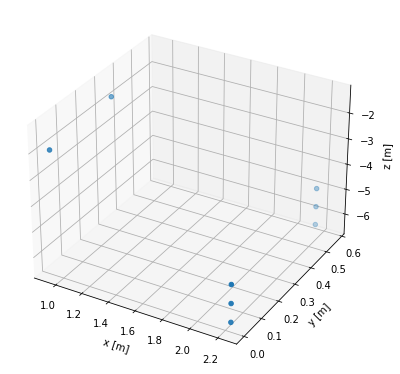

In [156]:
antn = [a[0] for a in ant_sector]
antx = [a[1] for a in ant_sector]
anty = [a[2] for a in ant_sector]
antz = [a[3] for a in ant_sector]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(antx,anty,antz)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

2.5759385847911633e-10
5e-08
10.0 14.878001428693416
10.0 0.004399671506619598
10.0 0.0289406236734054
10.0 14.859016164923087
10.0 0.0289406236734054
10.0 14.859016164923087
10.0 0.0289406236734054
10.0 14.859016164923087
1035.2278585671565
108.55349430294332


/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplo

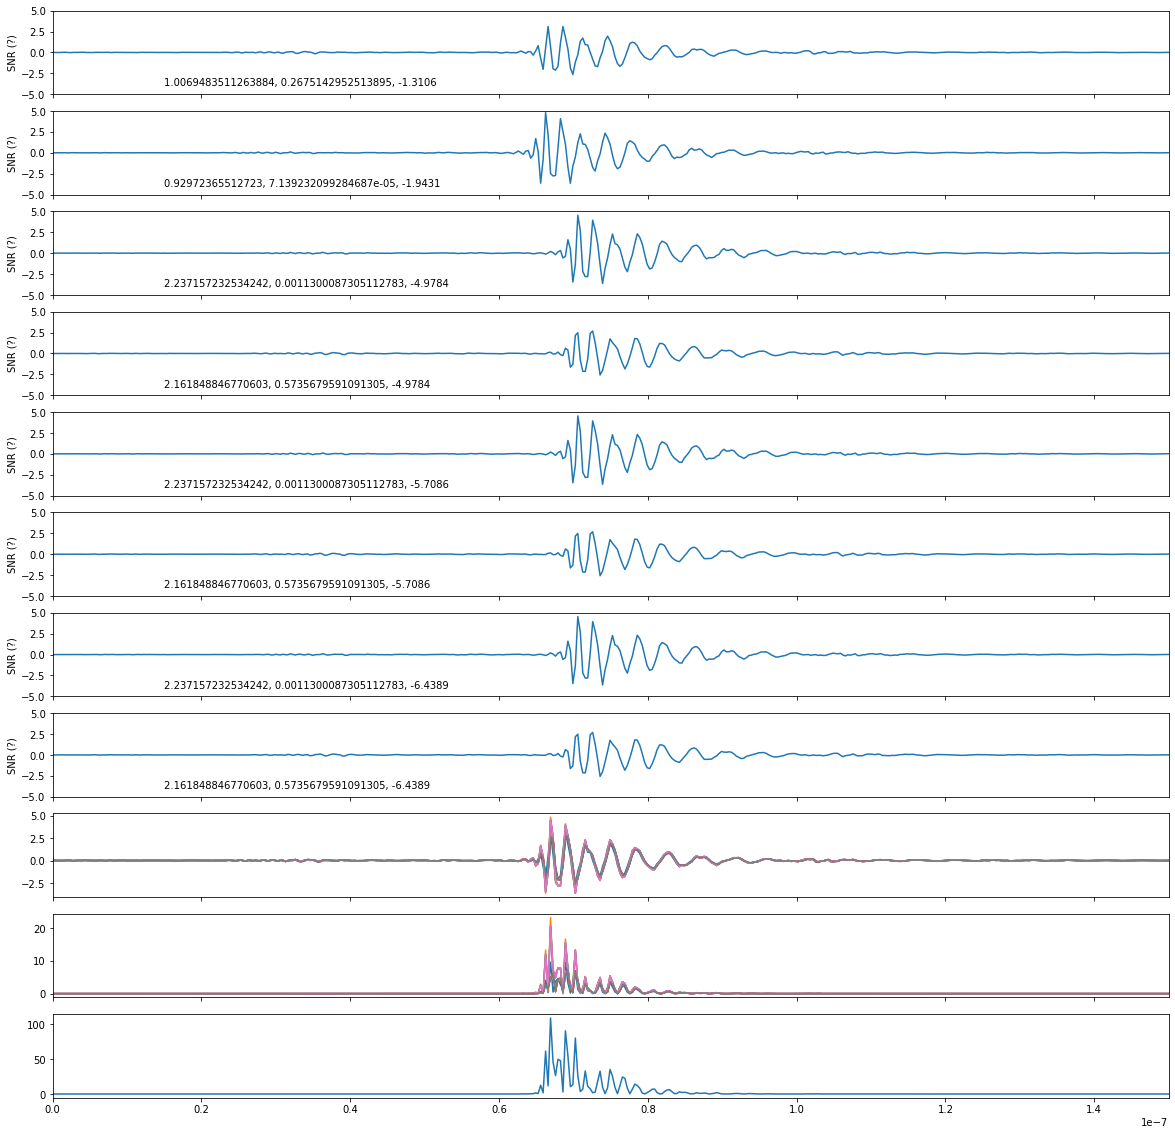

In [157]:
from operator import itemgetter
from scipy.ndimage.interpolation import shift

c = 299792458

normal = np.array([1., 0., 0.])
point = np.array([0., 0., 0.])

temphits = []
for ant in ant_sector:
    d = [ant['ant_id'], ant['x'], ant['y'], ant['z'],np.degrees(np.arctan(ant['y']/ant['x'])), -10.] 
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)

adjhits = adjhits[adjhits[:, 3].argsort()][::-1]

hittimes = [t[4] for t in adjhits]
refhit = adjhits[0][4]
print(refhit)
tshift = refhit-0.5e-7
newhittimes = hittimes-tshift
adjhits = [[adjhits[i][0], adjhits[i][1], adjhits[i][2], adjhits[i][3], newhittimes[i], adjhits[i][5], adjhits[i][6]] for i in range(0,len(adjhits))]

print(adjhits[0][4])
startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(11,1,sharex='col', sharey='row')

ant_powers = []
m=0
for testhit in adjhits:
    hitn = testhit[0]
    hitx = testhit[1]
    hity = testhit[2]
    hitz = testhit[3]
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    print(hitth, hitphi)
    
    after_angresp = apply_angresp(this_ir3, hitth, hitphi)
    
    t = np.arange(total_len)*(0.333e-9)
    sampleshift = int(testtime//0.333e-9)-int(0.5e-7//0.33e-9)
    #print(testtime, testtime/0.333e-9, int(testtime//0.333e-9), testtime//0.333e-9)

    sig_shifted = np.roll(after_angresp, -1*sampleshift)

    
    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i].plot(t, after_angresp[0:total_len])
    ax[i].set_ylim(-5,5)
    ax[i].set_xlim(0.,1.5e-7)
    ax[i].annotate('%s, %s, %s'%(hitx, hity, hitz), xy=(0.1,0.1), xycoords='axes fraction')
    m+=1
    
    if j == 0:
        ax[i].set_ylabel('SNR (?)')
    if i == 9:
        ax[i].set_xlabel('Time [s]')
        
    ax[8].plot(t, sig_shifted[0:total_len])
    ax[9].plot(t, np.absolute(sig_shifted[0:total_len])**2)
    
    ant_power = np.absolute(sig_shifted[0:total_len]**2)
    ant_powers.append(ant_power)
    
plt.rcParams["figure.figsize"] = (9,5)

ant_powers = np.array(ant_powers)
total_power = np.sum(ant_powers, axis=0)
print(np.sum(total_power))
print(np.max(total_power))
ax[10].plot(t, total_power)

9.37187597258782e-09
5e-08
35.0 14.878001428693416
sampleshift -1
35.0 0.004399671506619598
sampleshift -6
35.0 0.0289406236734054
sampleshift -19
35.0 14.859016164923087
sampleshift -19
35.0 0.0289406236734054
sampleshift -24
35.0 14.859016164923087
sampleshift -24
35.0 0.0289406236734054
sampleshift -29
35.0 14.859016164923087
sampleshift -29
140.16156607175603
9.076473043816707


/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplo

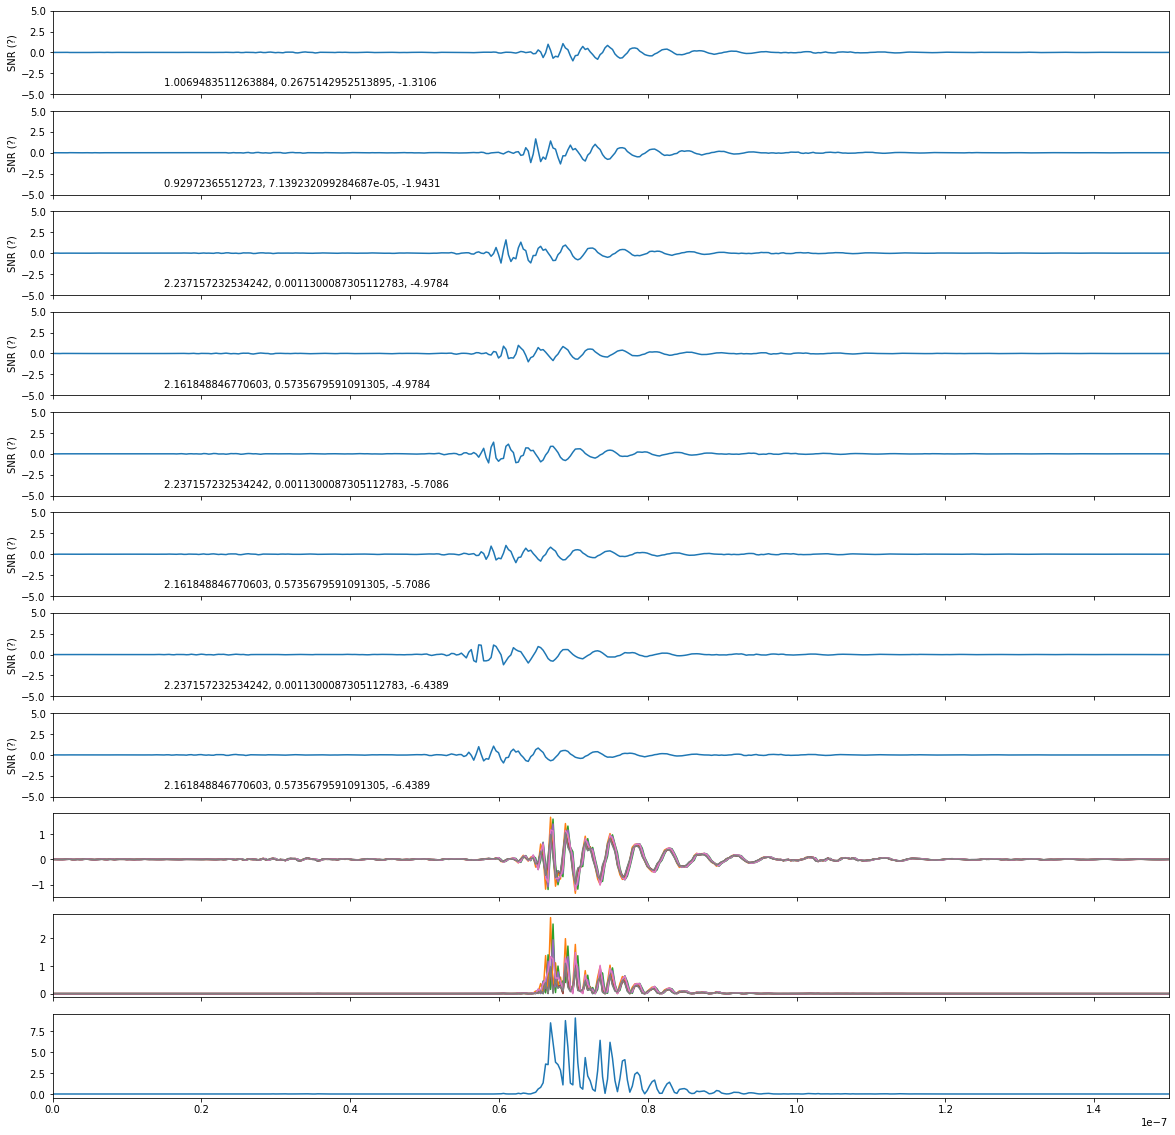

In [158]:
from operator import itemgetter
from scipy.ndimage.interpolation import shift

c = 299792458

normal = np.array([1., 0., 1.])
point = np.array([0., 0., 0.])

temphits = []
for ant in ant_sector:
    d = [ant['ant_id'], ant['x'], ant['y'], ant['z'],np.degrees(np.arctan(ant['y']/ant['x'])), -10.] 
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)

adjhits = adjhits[adjhits[:, 3].argsort()][::-1]

hittimes = [t[4] for t in adjhits]
refhit = adjhits[0][4]
print(refhit)
tshift = refhit-0.5e-7
newhittimes = hittimes-tshift
adjhits = [[adjhits[i][0], adjhits[i][1], adjhits[i][2], adjhits[i][3], newhittimes[i], adjhits[i][5], adjhits[i][6]] for i in range(0,len(adjhits))]

print(adjhits[0][4])
startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(11,1,sharex='col', sharey='row')

ant_powers = []
m=0
for testhit in adjhits:
    hitn = testhit[0]
    hitx = testhit[1]
    hity = testhit[2]
    hitz = testhit[3]
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    print(hitth, hitphi)
    
    after_angresp = apply_angresp(this_ir3, hitth, hitphi)
    
    t = np.arange(total_len)*(0.333e-9)
    sampleshift = int(testtime//0.333e-9)-int(0.5e-7//0.33e-9)
    #print(testtime, testtime/0.333e-9, int(testtime//0.333e-9), testtime//0.333e-9)
    print("sampleshift", sampleshift)
    sig_shifted = np.roll(after_angresp, -1*sampleshift)
    noise = make_noise(sig_shifted)
    #sig_shifted = sig_shifted+noise

    
    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i].plot(t, after_angresp[0:total_len])
    ax[i].set_ylim(-5,5)
    ax[i].set_xlim(0.,1.5e-7)
    ax[i].annotate('%s, %s, %s'%(hitx, hity, hitz), xy=(0.1,0.1), xycoords='axes fraction')
    m+=1
    
    if j == 0:
        ax[i].set_ylabel('SNR (?)')
    if i == 9:
        ax[i].set_xlabel('Time [s]')
        
    ax[8].plot(t, sig_shifted[0:total_len])
    ax[9].plot(t, np.absolute(sig_shifted[0:total_len])**2)
    
    ant_power = np.absolute(sig_shifted[0:total_len]**2)
    ant_powers.append(ant_power)
    
plt.rcParams["figure.figsize"] = (9,5)

ant_powers = np.array(ant_powers)
total_power = np.sum(ant_powers, axis=0)
print(np.sum(total_power))
print(np.max(total_power))
ax[10].plot(t, total_power)

3.97108263165596e-09
5e-08
10.0 4.878001428693418
10.0 9.99560032849338
10.0 9.971059376326593
10.0 4.859016164923088
10.0 9.971059376326593
10.0 4.859016164923088
10.0 9.971059376326593
10.0 4.859016164923088
6195.273480316751
120.38865358688953


/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplo

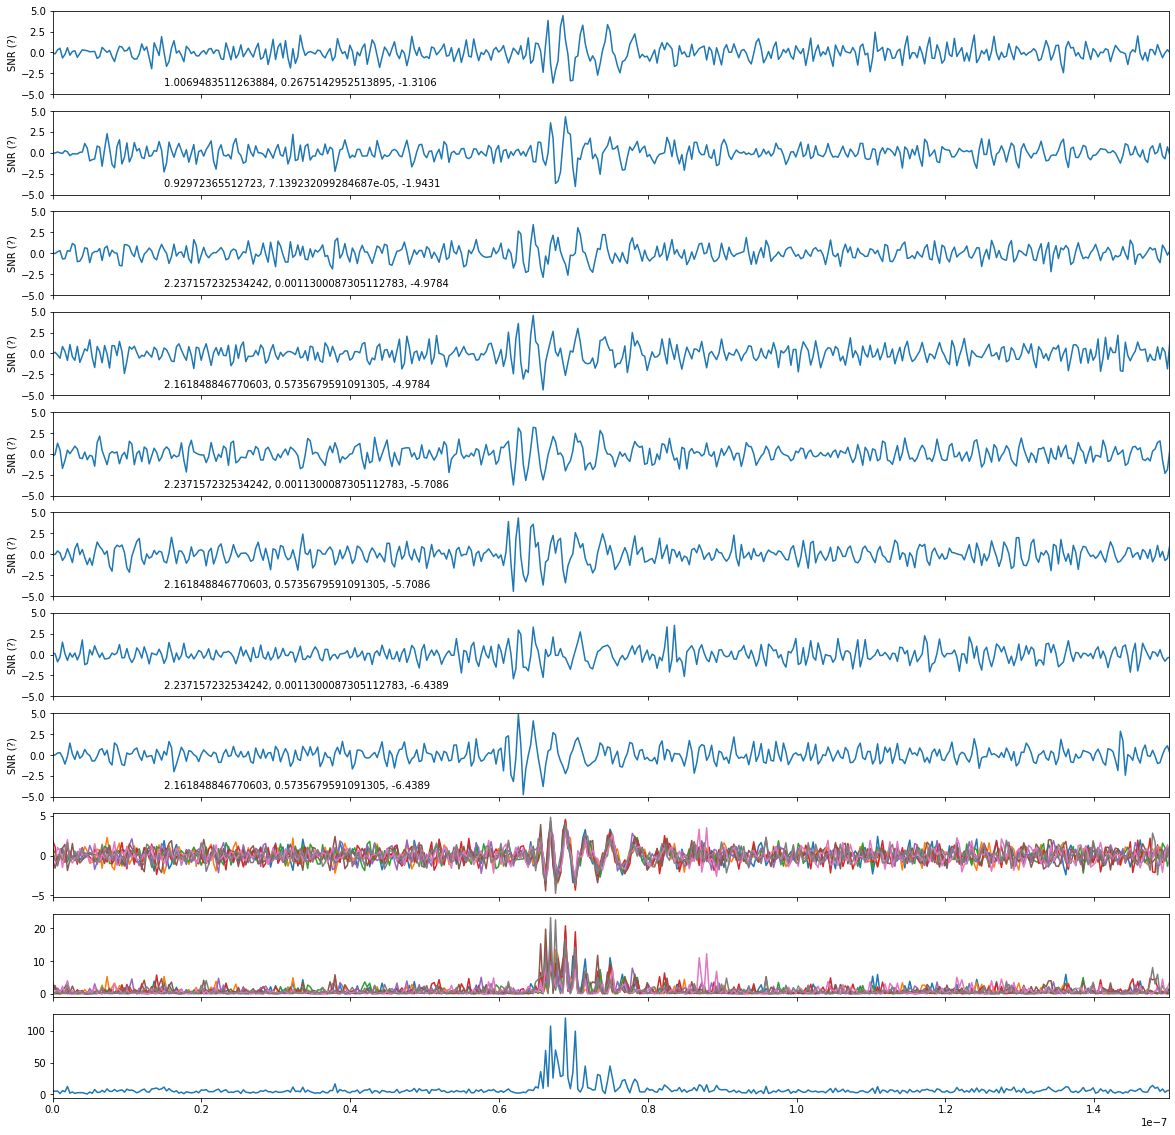

In [159]:
from operator import itemgetter
from scipy.ndimage.interpolation import shift

c = 299792458

normal = ang_to_norm(0., 10.)
#normal = np.array([1., 0., 0.5])
point = np.array([0., 0., 0.])

temphits = []
for ant in ant_sector:
    d = [ant['ant_id'], ant['x'], ant['y'], ant['z'],np.degrees(np.arctan(ant['y']/ant['x'])), -10.] 
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)

adjhits = adjhits[adjhits[:, 3].argsort()][::-1]

hittimes = [t[4] for t in adjhits]
refhit = adjhits[0][4]
print(refhit)
tshift = refhit-0.5e-7
newhittimes = hittimes-tshift
adjhits = [[adjhits[i][0], adjhits[i][1], adjhits[i][2], adjhits[i][3], newhittimes[i], adjhits[i][5], adjhits[i][6]] for i in range(0,len(adjhits))]

print(adjhits[0][4])
startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(11,1,sharex='col', sharey='row')

ant_powers = []
m=0
for testhit in adjhits:
    hitn = testhit[0]
    hitx = testhit[1]
    hity = testhit[2]
    hitz = testhit[3]
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    print(hitth, hitphi)
    
    after_angresp = apply_angresp(this_ir3, hitth, hitphi)
    noise = make_noise(after_angresp)
    after_angresp = after_angresp+noise

    
    t = np.arange(total_len)*(0.333e-9)
    sampleshift = int(testtime//0.333e-9)-int(0.5e-7//0.33e-9)
    #print(testtime, testtime/0.333e-9, int(testtime//0.333e-9), testtime//0.333e-9)
    sig_shifted = np.roll(after_angresp, -1*sampleshift)

    
    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i].plot(t, after_angresp[0:total_len])
    ax[i].set_ylim(-5,5)
    ax[i].set_xlim(0.,1.5e-7)
    ax[i].annotate('%s, %s, %s'%(hitx, hity, hitz), xy=(0.1,0.1), xycoords='axes fraction')
    m+=1
    
    if j == 0:
        ax[i].set_ylabel('SNR (?)')
    if i == 9:
        ax[i].set_xlabel('Time [s]')
        
    ax[8].plot(t, sig_shifted[0:total_len])
    ax[9].plot(t, np.absolute(sig_shifted[0:total_len])**2)
    
    ant_power = np.absolute(sig_shifted[0:total_len]**2)
    ant_powers.append(ant_power)
    
plt.rcParams["figure.figsize"] = (9,5)

ant_powers = np.array(ant_powers)
total_power = np.sum(ant_powers, axis=0)
print(np.sum(total_power))
print(np.max(total_power))
ax[10].plot(t, total_power)

In [160]:
def do_sim(normal, point):
    c = 299792458

    #normal = np.array([1., 0., 0.5])
    #point = np.array([0., 0., 0.])

    temphits = []
    for ant in ant_sector:
        d = [ant['ant_id'], ant['x'], ant['y'], ant['z'],np.degrees(np.arctan(ant['y']/ant['x'])), -10.] 
        antn = d[0]
        antpos = d[1:]
        d = dist_to_plane(normal, point, antpos)
        hittime = d/c
        hitangle =  calc_hitangle(normal, antpos)
        hitth = hitangle[1]
        hitphi = hitangle[0]
        #print(antpos, d, hittime)
        temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

    temphits = np.array(temphits)
    temphits = temphits[temphits[:,4].argsort()]
    hittimes = [t[4] for t in temphits]
    firsthit = hittimes[0]
    tshift = firsthit# - 10e-9
    newhittimes = hittimes-tshift

    adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
    adjhits = np.array(adjhits)

    adjhits = adjhits[adjhits[:, 3].argsort()][::-1]

    hittimes = [t[4] for t in adjhits]
    refhit = adjhits[0][4]
    tshift = refhit-0.5e-7
    newhittimes = hittimes-tshift
    adjhits = [[adjhits[i][0], adjhits[i][1], adjhits[i][2], adjhits[i][3], newhittimes[i], adjhits[i][5], adjhits[i][6]] for i in range(0,len(adjhits))]

    startphase = np.random.random_sample()

    #import matplotlib.pyplot as plt
    #plt.rcParams["figure.figsize"] = (20,20)

    #fig, ax = plt.subplots(11,1,sharex='col', sharey='row')

    ant_powers = []
    m=0
    for testhit in adjhits:
        hitn = testhit[0]
        hitx = testhit[1]
        hity = testhit[2]
        hitz = testhit[3]
        testtime = testhit[4]
        hitphi = testhit[5]
        hitth = testhit[6]

        this_ir3 = impulse(testtime, startphase)
        #print(hitth, hitphi)

        after_angresp = apply_angresp(this_ir3, hitth, hitphi)
        #noise = make_noise(after_angresp)
        #after_angresp = after_angresp+noise


        t = np.arange(total_len)*(0.333e-9)
        sampleshift = int(testtime//0.333e-9)-int(0.5e-7//0.33e-9)
        #print(testtime, testtime/0.333e-9, int(testtime//0.333e-9), testtime//0.333e-9)
        sig_shifted = np.roll(after_angresp, -1*sampleshift)


        #if 0<=m<9:
        #    j = 0
        #    i = m
        #if 9<=m<18:
        #    j = 1
        #    i = m-9
        #ax[i].plot(t, after_angresp[0:total_len])
        #ax[i].set_ylim(-5,5)
        #ax[i].set_xlim(0.,1.5e-7)
        #ax[i].annotate('%s, %s, %s'%(hitx, hity, hitz), xy=(0.1,0.1), xycoords='axes fraction')
        m+=1

        #if j == 0:
        #    ax[i].set_ylabel('SNR (?)')
        #if i == 9:
        #    ax[i].set_xlabel('Time [s]')

        #ax[8].plot(t, sig_shifted[0:total_len])
        #ax[9].plot(t, np.absolute(sig_shifted[0:total_len])**2)

        ant_power = np.absolute(sig_shifted[0:total_len]**2)
        ant_powers.append(ant_power)

    plt.rcParams["figure.figsize"] = (9,5)

    ant_powers = np.array(ant_powers)
    total_power = np.sum(ant_powers, axis=0)
    #print(np.sum(total_power))
    #print(np.max(total_power))
    ax[10].plot(t, total_power)
    return(np.max(total_power))

In [161]:
def norm_to_ang(norm):
    x = norm[0]
    y = norm[1]
    z = norm[2]
    
    phi = np.arctan(y/x)
    th = np.arccos(z/np.sqrt(x**2+y**2+z**2))
    return np.degrees(phi), np.degrees(th)

def ang_to_norm(th, phi):
    x = np.cos(np.radians(phi))*np.cos(np.radians(th))
    y = np.sin(np.radians(phi))*np.cos(np.radians(th))
    z = np.sin(np.radians(th))
    
    norm = 1./np.sqrt(x**2+y**2+z**2)
    return -1.*norm*np.array([x,y,z])

In [162]:
print(norm_to_ang(np.array([1., 0., 1.])))
print(ang_to_norm(90.0, 0.))

(0.0, 45.00000000000001)
[-6.123234e-17 -0.000000e+00 -1.000000e+00]


In [172]:
phis = np.arange(-60.,60.,3.)

avgpowers = []
for phi_sig in phis:
    norm = ang_to_norm(0., phi_sig)
    point = np.array([0., 0., 0.])
    phi_powers = []
    for i in range(0,50):
        power = do_sim(norm,point)
        phi_powers.append(power)
    avgpower = np.average(phi_powers)
    avgpowers.append(avgpower)
    print(phi_sig, norm, avgpower)

-60.0 [-0.5        0.8660254 -0.       ] 1.0043883011436878
-57.0 [-0.54463904  0.83867057 -0.        ] 1.180805843772692
-54.0 [-0.58778525  0.80901699 -0.        ] 1.3291915721312284
-51.0 [-0.62932039  0.77714596 -0.        ] 1.5699054066370906
-48.0 [-0.66913061  0.74314483 -0.        ] 1.8493642209099632
-45.0 [-0.70710678  0.70710678 -0.        ] 2.2628306019947804
-42.0 [-0.74314483  0.66913061 -0.        ] 2.763622454898644
-39.0 [-0.77714596  0.62932039 -0.        ] 3.356203002207402
-36.0 [-0.80901699  0.58778525 -0.        ] 4.633556720417218
-33.0 [-0.83867057  0.54463904 -0.        ] 6.589215566656873
-30.0 [-0.8660254  0.5       -0.       ] 9.178514571556201
-27.0 [-0.89100652  0.4539905  -0.        ] 12.719415870709987
-24.0 [-0.91354546  0.40673664 -0.        ] 18.076537801316285
-21.0 [-0.93358043  0.35836795 -0.        ] 24.76924493076341
-18.0 [-0.95105652  0.30901699 -0.        ] 30.85557293539784
-15.0 [-0.96592583  0.25881905 -0.        ] 39.88313804798708
-12.0 [

(-10.0, 0.0)

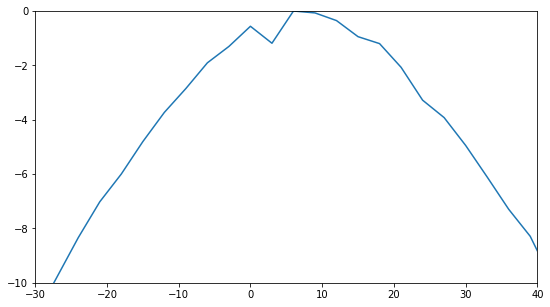

In [171]:
adjpow = 10.*np.log10(avgpowers)-max(10*np.log10(avgpowers))
plt.plot(phis, adjpow)
plt.xlim(-30,40)
plt.ylim(-10,0)